# Question:  What is the reliability of feelings across people and videos?

## Tasks: 

- [X] Separate plots for mturk and scan (only use scan for now)
- [ ] Talk to luke about mean/std, wont tell signal/noise the right way
- [ ] Overall ISC by emotion (add points on plot for pairwise ISC)
- [ ] Z score data w/in participants and compare


In [1]:
import numpy as np
from nltools.data import Adjacency
import pandas as pd
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')
import seaborn as sns
import matplotlib.cm as cm
import os

//anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
emotions = ['Afraid', 'Amused', 'Angry', 'Anxious', 'Bored', 'Disgusted',
       'Frustrated', 'Happy', 'Hopeful', 'Inspired', 'Moved', 'Proud',
       'Relieved', 'Sad', 'Surprised', 'Uncomfortable']

stimTranslation = {
    100 : '',
    108 : 'Cops Dont Cry',
    109 : 'Stranger Bonding',
    110 : 'Mortified',
    111 : 'Unexpected Twist',
    112 : 'Gmarks the Spot',
    113 : 'Finding Home',
    114 : 'This Is Going to Suck',
    115 : 'Best of Times',
    116 : ''
}

stimTranslation = {
    0 : '',
    1 : 'Stranger Bonding',
    2 : 'Unexpected Twist',
    3 : 'Cops Dont Cry',
    4 : 'Mortified',
    5 : 'Gmarks the Spot',
    6 : 'Best of Times',
    7 : 'Finding Home',
    9 : 'This is Going to Suck',
    10 : ''
}



emotionColors = {
'Amused'  : (0.99,0.01,0.01),
'Happy'  : (0.99,0.25,0.01),
'Surprised'  : (0.99,0.44,0.01),
'Relieved'  : (0.99,0.75,0.01),
'Hopeful'  : (0.99,0.99,0.01),
'Inspired'  : (0.6,0.99,0.01),
'Proud'  : (0.01,0.99,0.56),
'Moved'  : (0.01,0.99,0.89),
'Sad'  : (0.01,0.79,0.99),
'Afraid'  : (0.01,0.44,0.99),
'Anxious'  : (0.22,0.01,0.99),
'Uncomfortable'  : (0.68,0.01,0.99),
'Angry'  : (0.99,0.01,0.91),
'Frustrated'  : (0.99,0.01,0.4),
'Disgusted' : 'brown',
'Bored' : 'gray'}

stimColors = {
    0 : 'red',
    1 : 'orange',
    2 : 'yellow',
    3 : 'green',
    4 : 'teal',
    5 : 'blue',
    6 : 'purple',
    7 : 'pink'
}


In [3]:
data_path = '/Users/mdclark/Documents/Projects/MothBehavioralAnalysis/out/cf_predictions/'

# Are feelings the same between and within videos?

## Average ISC within videos

In [4]:
summary=[]
summary_stdev = []

for stim in [1,2,3,4,5,6,7,9]:
    emo_summary = []
    emo_std = []

    for emotion in emotionColors.keys():
        data = pd.read_csv(os.path.join(data_path, 'stim-%s_emo-%s_dilation-30.csv' % (stim, emotion)), index_col=0)
        data = data.loc[[x for x in data.index.values if len(x)==3],:] # only scans
        dist = Adjacency(pairwise_distances(data, metric='correlation'), matrix_type='distance')
        sim = dist.distance_to_similarity()
        emo_summary.append(sim.mean())
        emo_std.append(sim.std())
#     plt.plot(emo_summary)
#     plt.xticks(list(emotionColors.keys()))
#     plt.show()
    summary.append(emo_summary)
    summary_stdev.append(emo_std)


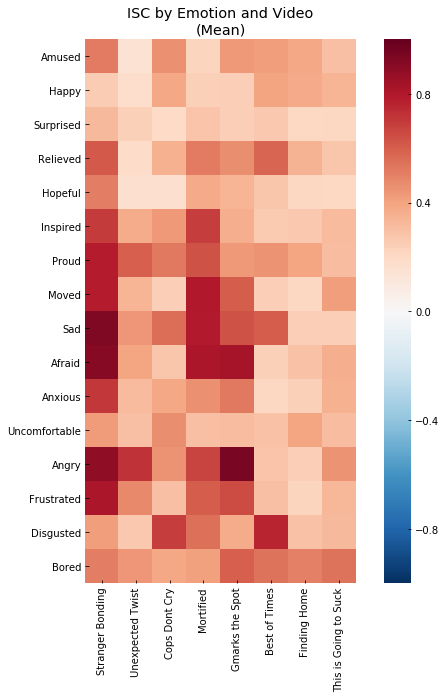

In [5]:
plt.figure(figsize=(10,10))


ax = sns.heatmap(pd.DataFrame(summary).T, cmap='RdBu_r', vmin=-1, vmax=1,
            yticklabels=emotionColors.keys(), xticklabels=list(stimTranslation.values())[1:-1], square=True);
plt.title('ISC by Emotion and Video\n(Mean)')
plt.savefig('./figures/Q1_Reliability_emotionISC_mean.png')

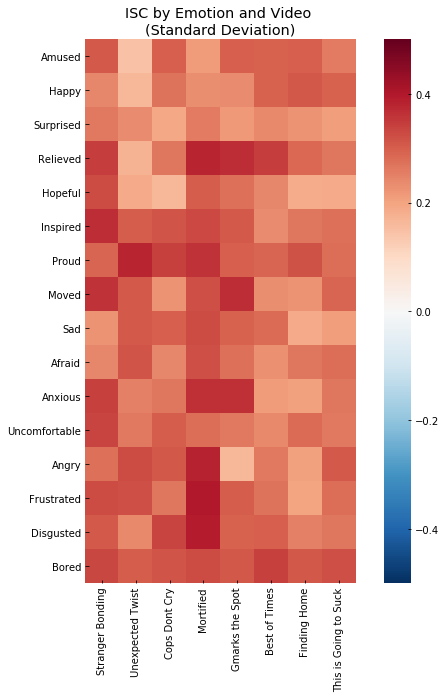

In [6]:
plt.figure(figsize=(10,10))

ax = sns.heatmap(pd.DataFrame(summary_stdev).T, cmap='RdBu_r', vmin=-.5, vmax=.5,
            yticklabels=emotionColors.keys(), xticklabels=list(stimTranslation.values())[1:-1], square=True);

plt.title('ISC by Emotion and Video \n(Standard Deviation)')
plt.savefig('./figures/Q1_Reliability_emotionISC_stdev.png')

Text(0.5, 1, 'ISC by Emotion and Video\n(Mean)')

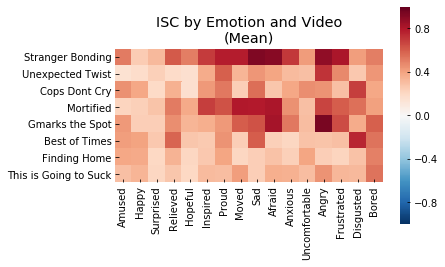

In [7]:
ax = sns.heatmap(pd.DataFrame(summary), cmap='RdBu_r', vmin=1, vmax=-1,
            xticklabels=emotionColors.keys(), yticklabels=list(stimTranslation.values())[1:-1], square = True);
plt.title('ISC by Emotion and Video\n(Mean)')
# plt.savefig('./figures/Q1_Reliability_emotionISC_mean.png')

Text(0.5, 1, 'ISC by Emotion and Video \n(Standard Deviation)')

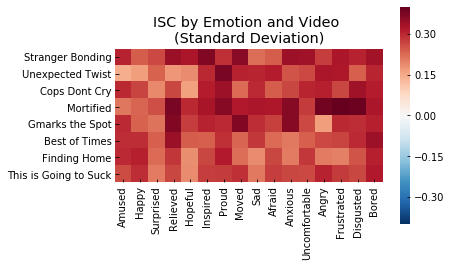

In [8]:
ax = sns.heatmap(pd.DataFrame(summary_stdev), cmap='RdBu_r', vmin=-.4, vmax=.4,
            xticklabels=emotionColors.keys(), yticklabels=list(stimTranslation.values())[1:-1], square = True);
plt.title('ISC by Emotion and Video \n(Standard Deviation)')
# plt.savefig('./figures/Q1_Reliability_emotionISC_stdev.png')

In [9]:
sdf = pd.DataFrame(summary)
sdf.columns = emotionColors.keys()
sdf = sdf.T

## How do feelings vary within and between videos

Text(0.5, 1.0, 'Average Correlation by Video and Emotion')

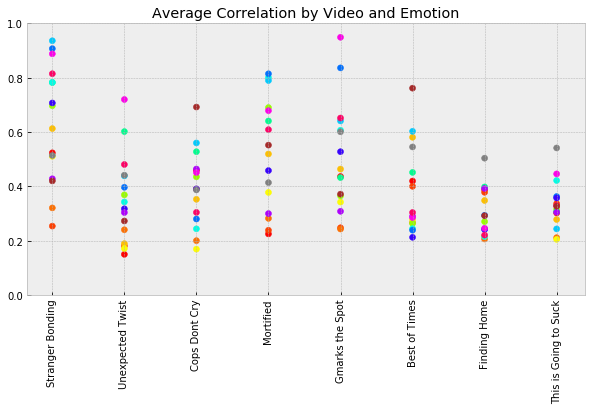

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for i in range(8): 
    plt.scatter([i] * len(sdf[i]), sdf[i], c=list(emotionColors.values()))
    
plt.ylim(0,1)
plt.xticks(rotation=90)


ax.set_xticklabels(list(stimTranslation.values())); 

plt.title('Average Correlation by Video and Emotion')

## Compare emotions between participants between each video

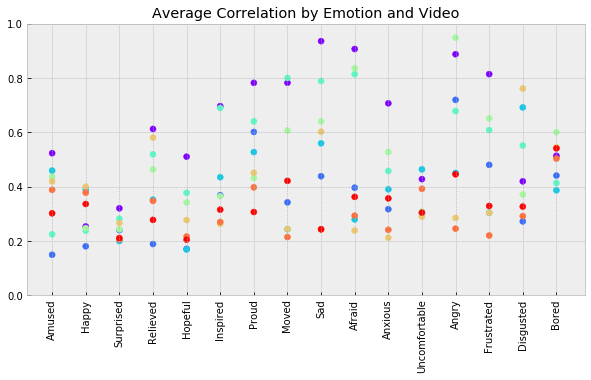

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))


colors = list(iter(cm.rainbow(np.linspace(0, 1, 8))))
for i in range(len(sdf.index.values)): 
    emo = sdf.index.values[i]
    plt.scatter([emo] * len(sdf.loc[emo,:]), sdf.loc[emo,:], c=colors)
    
plt.xticks(rotation=90)
plt.ylim(0,1)

plt.title('Average Correlation by Emotion and Video');

# Are emotion ratings consistent overall between participants?

In [12]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)


# Creates a similarity matrix for all emotions (similar to above)
emo_summary = []

for emo in emotionColors.keys(): 
    df = pd.DataFrame()

    for stim in [1,2,3,4,5,6,7,9]: 
        df_add = pd.read_csv(os.path.join(data_path, 'stim-%s_emo-%s_dilation-30.csv' % (stim, emo)), index_col=0)
        df_add = df_add.loc[[x for x in df_add.index.values if len(x)==3],:] # only scans
        df_add = df_add.sub(df_add.mean(axis=1), axis=0) # Zero center center data
        df = pd.concat([df, df_add], axis=1, sort=False)
        
    df.dropna(inplace=True)
    dist = pairwise_distances(df, metric='correlation')
    sim = 1-dist
    emo_summary.append(sim.mean())




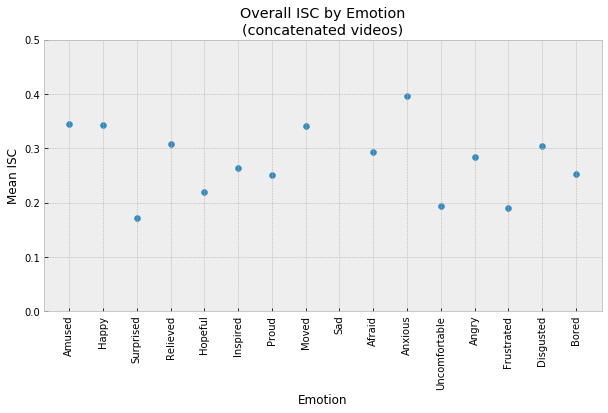

In [13]:
concat = pd.DataFrame(emo_summary).T
concat.columns = emotionColors.keys()


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
plt.scatter(concat.columns.values, concat)
plt.xlabel('Emotion')
plt.ylabel('Mean ISC')
plt.ylim(0,.5)
plt.xticks(rotation=90);
plt.title('Overall ISC by Emotion\n(concatenated videos)')
plt.savefig('./figures/Q1_Reliability_concatenatedEmos.png')